# Australian Banking Finance

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from scipy.cluster.hierarchy import dendrogram, linkage

In [248]:
bankingFinanceData = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/australian/australian.dat", sep=" ", header=None)
myData = bankingFinanceData.iloc[:,14]
bankingFinanceData.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
5,0,15.83,0.585,2,8,8,1.500,1,1,2,0,2,100,1,1
6,1,17.42,6.500,2,3,4,0.125,0,0,0,0,2,60,101,0
7,0,58.67,4.460,2,11,8,3.040,1,1,6,0,2,43,561,1
8,1,27.83,1.000,1,2,8,3.000,0,0,0,0,2,176,538,0
9,0,55.75,7.080,2,4,8,6.750,1,1,3,1,2,100,51,0


In [249]:
labelencoder_X = LabelEncoder()
bankingFinanceData.iloc[:, 0] = labelencoder_X.fit_transform(bankingFinanceData.iloc[:, 0])
bankingFinanceData.iloc[:, 3] = labelencoder_X.fit_transform(bankingFinanceData.iloc[:, 3])
bankingFinanceData.iloc[:, 4] = labelencoder_X.fit_transform(bankingFinanceData.iloc[:, 4])
bankingFinanceData.iloc[:, 5] = labelencoder_X.fit_transform(bankingFinanceData.iloc[:, 5])
bankingFinanceData.iloc[:, 7] = labelencoder_X.fit_transform(bankingFinanceData.iloc[:, 7])
bankingFinanceData.iloc[:, 8] = labelencoder_X.fit_transform(bankingFinanceData.iloc[:, 8])
bankingFinanceData.iloc[:, 10] = labelencoder_X.fit_transform(bankingFinanceData.iloc[:, 10])
bankingFinanceData.iloc[:, 11] = labelencoder_X.fit_transform(bankingFinanceData.iloc[:, 11])
onehotencoder = OneHotEncoder(categorical_features = [0,3,4,5,7,8,10,11])
bankingFinanceData = onehotencoder.fit_transform(bankingFinanceData).toarray()




#Should dependent variable be encoded individually in order to process data?

# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
myData = labelencoder_y.fit_transform(myData)


C:\Users\Kucuk\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Kucuk\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [250]:
bankingFinanceData

array([[0.000e+00, 1.000e+00, 0.000e+00, ..., 1.000e+02, 1.213e+03,
        0.000e+00],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 1.600e+02, 1.000e+00,
        0.000e+00],
       [1.000e+00, 0.000e+00, 1.000e+00, ..., 2.800e+02, 1.000e+00,
        0.000e+00],
       ...,
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+02, 1.000e+00,
        1.000e+00],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 1.200e+02, 1.200e+01,
        1.000e+00],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 5.600e+02, 1.000e+00,
        1.000e+00]])

In [251]:
myData

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,

In [263]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(bankingFinanceData[:,0:14], myData, test_size = 0.25, train_size = 0.75)

# Dendogram Hierarchical Clustering

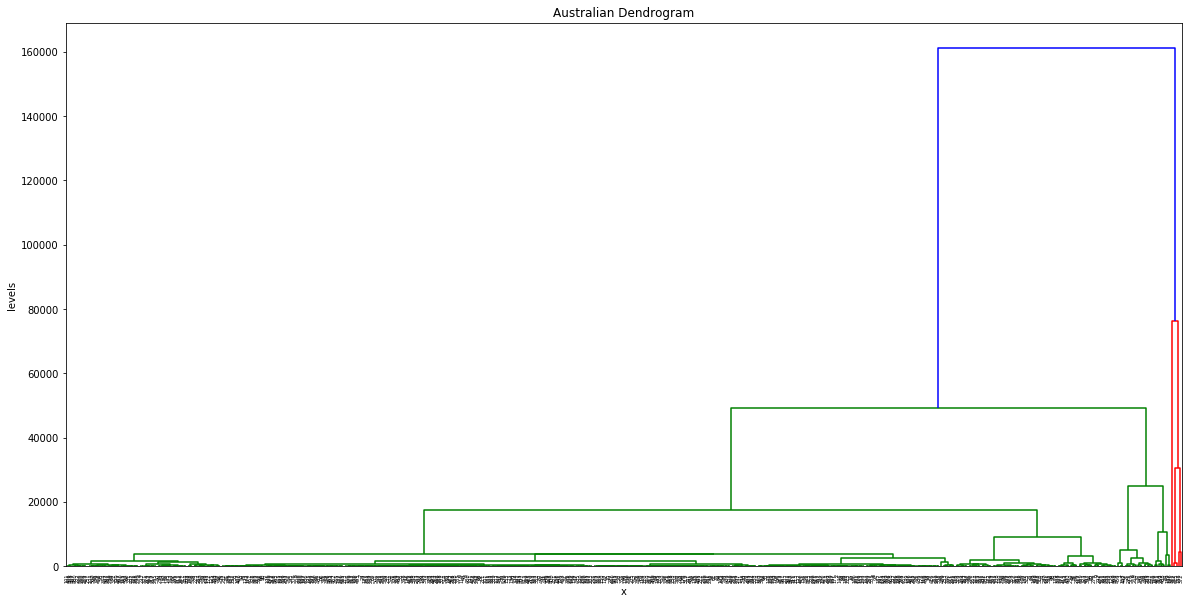

In [109]:
plt.figure(figsize=(20, 10))
plt.title('Australian Dendrogram')
plt.xlabel('x')
plt.ylabel('levels')
dendrogram(linkage(Xtrain, 'ward'))
plt.show()

# K-NN Classification

Categorical datas are represented as numerical, and they need to be taught to machine to calculate those as expressed categorical.

In [264]:
model = KNeighborsClassifier(n_neighbors = 10, metric = 'euclidean').fit(Xtrain, Ytrain)
predictions =  model.predict(Xtest)

In [265]:
confusion_matrix(Ytest, predictions)
accuracy = accuracy_score(Ytest, predictions)

print(confusion_matrix(Ytest,predictions))
print(accuracy)

[[64 35]
 [34 40]]
0.6011560693641619
